In [1]:
# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

In [2]:
# Get Data in Dataframe 
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# head() shows the first 5 rows of the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,...,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


There are 1460 entries in the train data set and 1459 entries in test data set. The data contains some NaN values too.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             292 non-null    int64  
 1   MSSubClass     292 non-null    int64  
 2   MSZoning       292 non-null    object 
 3   LotFrontage    247 non-null    float64
 4   LotArea        292 non-null    int64  
 5   Street         292 non-null    object 
 6   Alley          14 non-null     object 
 7   LotShape       292 non-null    object 
 8   LandContour    292 non-null    object 
 9   Utilities      292 non-null    object 
 10  LotConfig      292 non-null    object 
 11  LandSlope      292 non-null    object 
 12  Neighborhood   292 non-null    object 
 13  Condition1     292 non-null    object 
 14  Condition2     292 non-null    object 
 15  BldgType       292 non-null    object 
 16  HouseStyle     292 non-null    object 
 17  OverallQual    292 non-null    int64  
 18  OverallCon

# 2. Data Manipulation and Visualization

Lets check for NaN (null) values in the data

In [7]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      214
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
test.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage      45
LotArea           0
                 ..
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
Length: 80, dtype: int64


Lets check for the mean, standard deviation for Sales price

In [9]:
train['SalePrice'].describe()

count      1168.000000
mean     181477.005993
std       79105.586863
min       34900.000000
25%      130375.000000
50%      163995.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero.

Skew is: 1.953877705368286


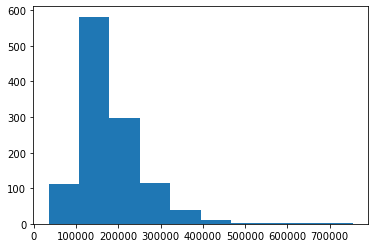

Skew is: 0.07360997199445295


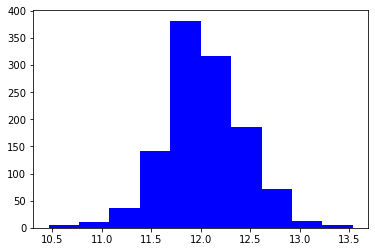

In [10]:
# Determining the Skewness of data 
print ("Skew is:", train.SalePrice.skew())

plt.hist(train.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
train['Skewed_SP'] = np.log(train['SalePrice']+1)
print ("Skew is:", train['Skewed_SP'].skew())
plt.hist(train['Skewed_SP'], color='blue')
plt.show()

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the follo

20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64

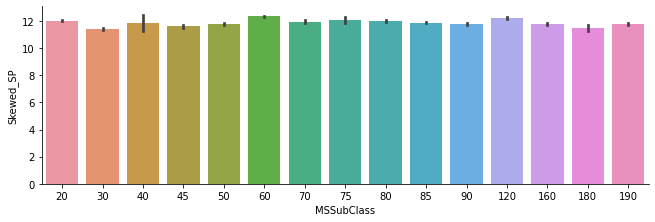

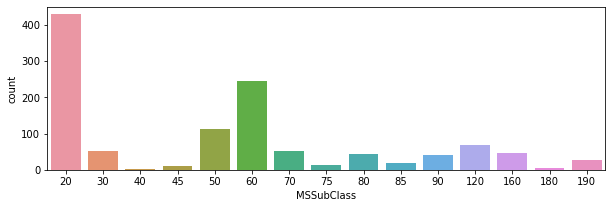

In [11]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=train)
train['MSSubClass'].value_counts()

MSSubClass = 60 has highest SalePrice while the sales of houses with MSSubClass = 20 is the highest.

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

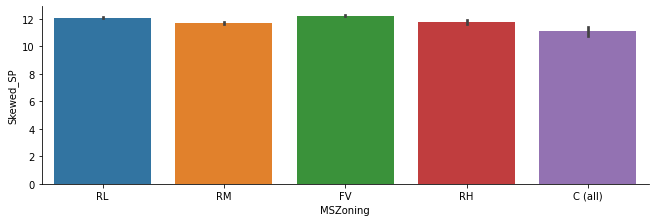

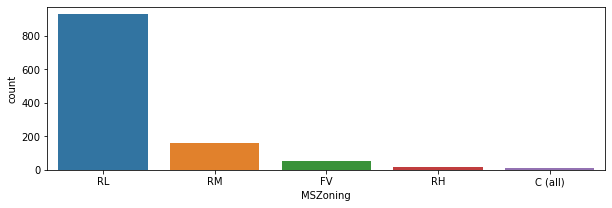

In [12]:
sns.factorplot('MSZoning', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=train, ax=axis1)
train['MSZoning'].value_counts()

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


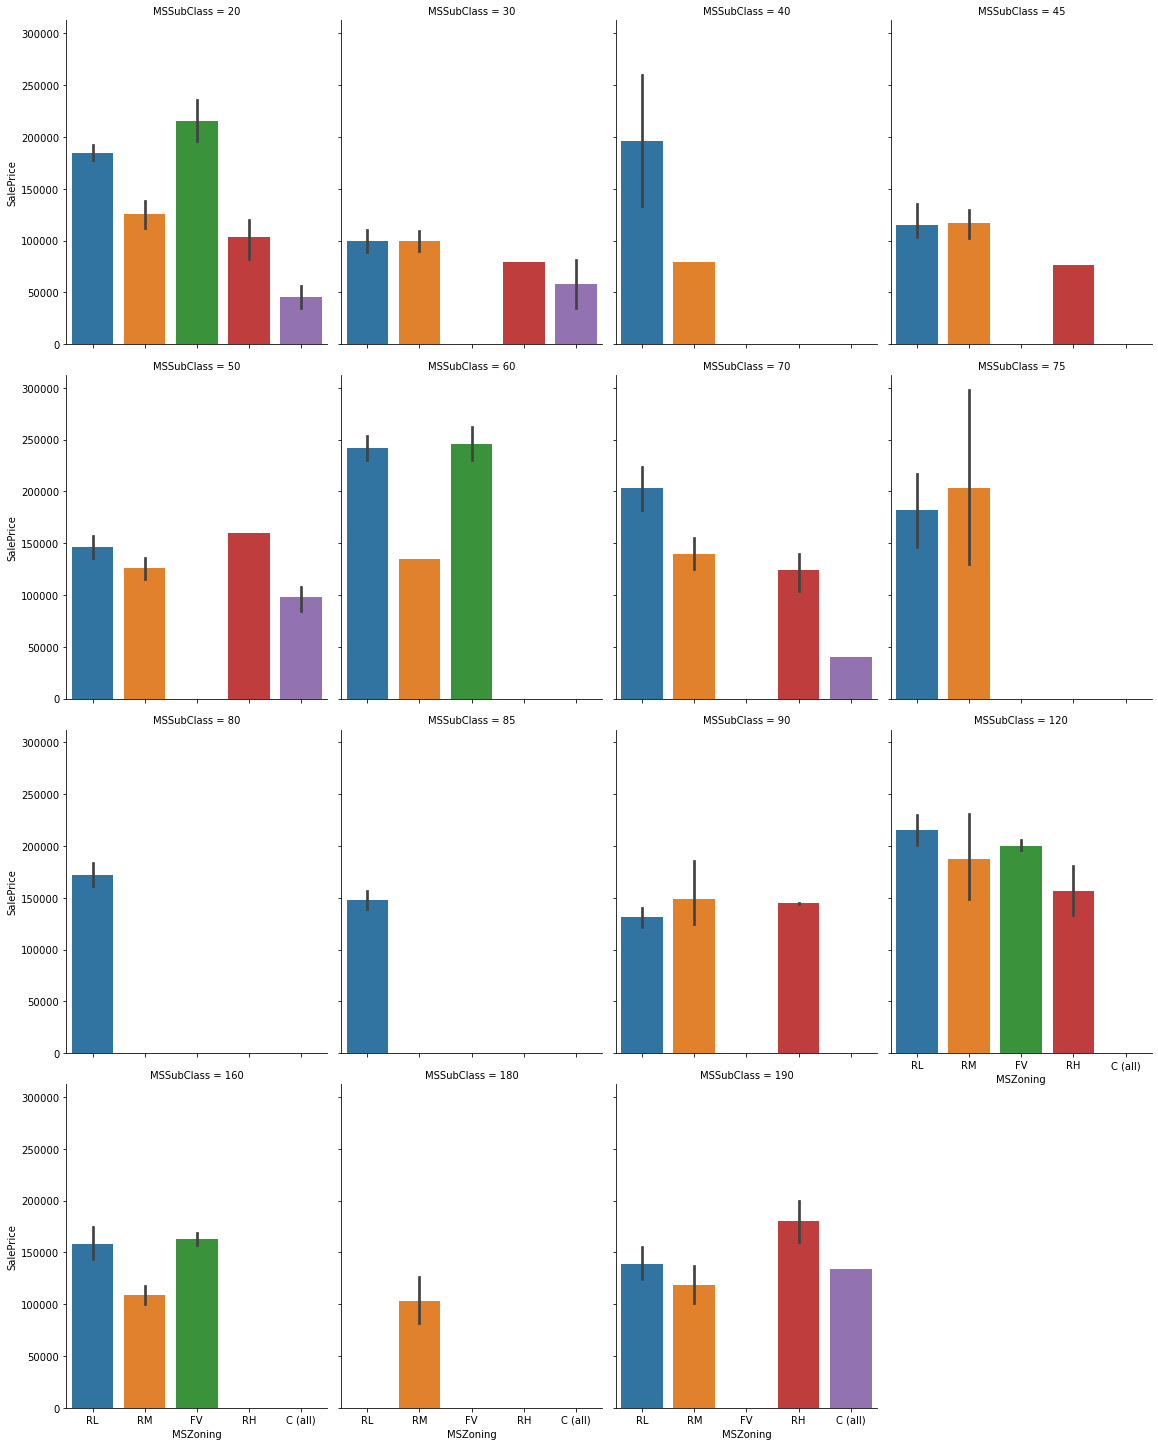

In [13]:
sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=train, kind='bar', col_wrap=4, aspect=0.8)

Lets analyze the numeric features using the numpy library

In [14]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Skewed_SP        float64
dtype: object

In [15]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
#print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
#print (corr['SalePrice'].sort_values(ascending=False)[-5:])
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')

SalePrice        1.000000
Skewed_SP        0.945730
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
GarageYrBlt      0.474346
MasVnrArea       0.466386
Fireplaces       0.459611
BsmtFinSF1       0.362874
LotFrontage      0.341294
OpenPorchSF      0.339500
2ndFlrSF         0.330386
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
BedroomAbvGr     0.158281
PoolArea         0.103280
ScreenPorch      0.100284
MoSold           0.072764
3SsnPorch        0.060119
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
LowQualFinSF    -0.032381
YrSold          -0.045508
MSSubClass      -0.060775
OverallCond     -0.065642
EnclosedPorch   -0.115004
KitchenAbvGr

We will analyze the features in their descending of correlation with sales price

In [16]:
train.OverallQual.unique()

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10], dtype=int64)

In [17]:
#Creating a pivot table 
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)

In [18]:
quality_pivot

,SalePrice
OverallQual,
1,50150.0
2,60000.0
3,86250.0
4,108959.0
5,133700.0
6,160000.0
7,200120.5
8,268750.0
9,343821.5


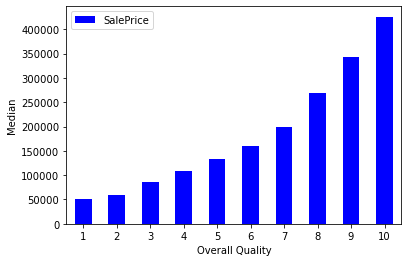

In [19]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

SalePrice varies directly with the Overall quality

<AxesSubplot:xlabel='GrLivArea', ylabel='Skewed_SP'>

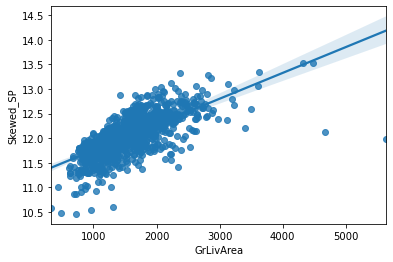

In [20]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train)

SalePrice increases as the GrLivArea increases. We will also get rid of the outliers which severely affect the prediction of the survival rate.

<AxesSubplot:xlabel='GrLivArea', ylabel='Skewed_SP'>

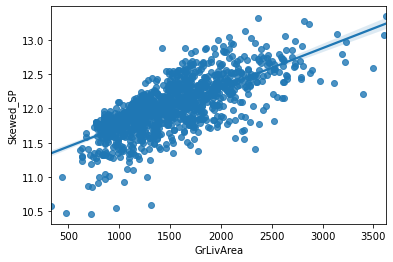

In [21]:
#Removing outliers
train = train[train['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train)

<AxesSubplot:xlabel='GarageArea', ylabel='Skewed_SP'>

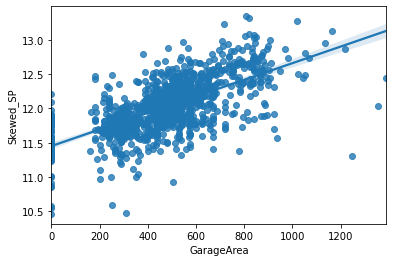

In [22]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=train)

GarageArea and SalePrice are directly proportional.

We will again get rid of the outliers.

<AxesSubplot:xlabel='GarageArea', ylabel='Skewed_SP'>

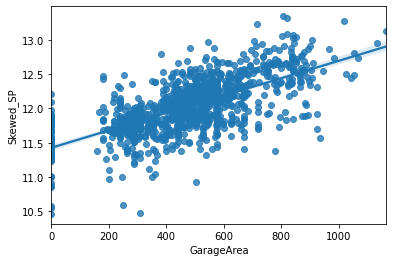

In [23]:
#Removing outliers
train = train[train['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=train)

In [24]:
#Removing the null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1155
MiscFeature,1117
Alley,1083
Fence,924
FireplaceQu,550
LotFrontage,213
GarageYrBlt,64
GarageCond,64
GarageType,64


In [25]:
# Pool null value refers to no pool area
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'TenC' 'Othr']


In [26]:
#Analysing the non numeric data 
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1160,1160,77,1160,1160,1160,1160,1160,1160,1160,...,1096,1096,1096,1096,1160,5,236,43,1160,1160
unique,5,2,2,4,4,1,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,921,1157,41,736,1042,1160,837,1098,182,1000,...,686,487,1042,1053,1063,2,128,39,996,942


<AxesSubplot:>

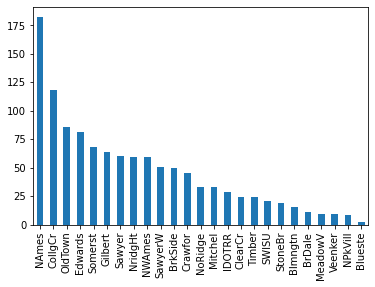

In [27]:
train['Neighborhood'].value_counts().plot(kind='bar')

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


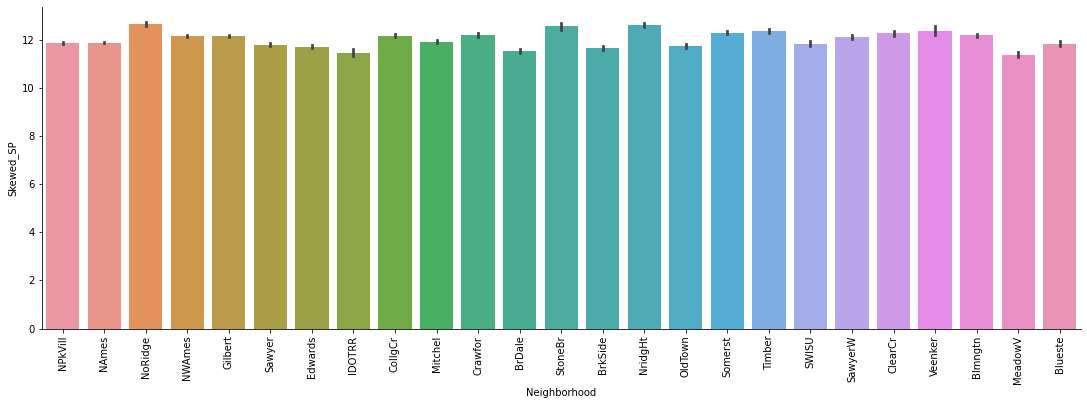

In [28]:
g = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=train, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

In [29]:
train['Condition1'].value_counts()

Norm      1000
Feedr       66
Artery      38
RRAn        20
PosN        15
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [30]:
train['Condition2'].value_counts()

Norm      1148
Feedr        6
Artery       2
RRAe         1
PosA         1
RRNn         1
RRAn         1
Name: Condition2, dtype: int64

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


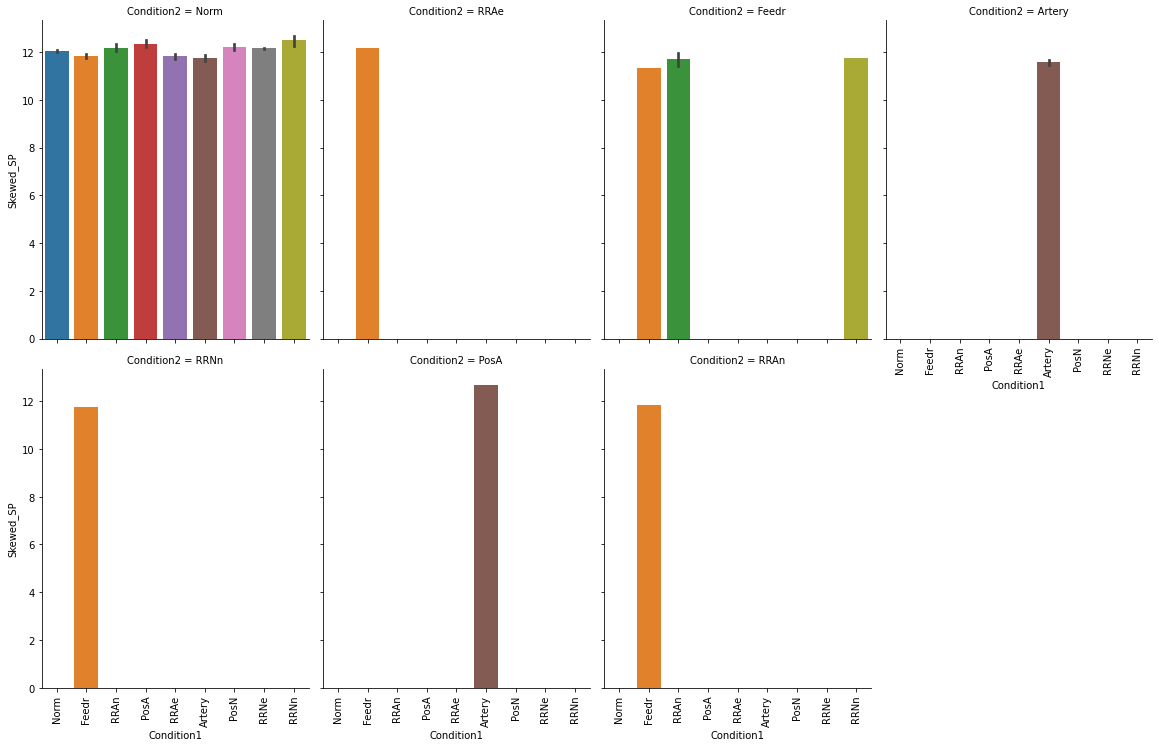

In [31]:
g = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [32]:
train['SaleCondition'].value_counts()

Normal     942
Partial    104
Abnorml     80
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [33]:
train['SaleType'].value_counts()

WD       996
New      102
COD       38
ConLD      7
ConLI      5
ConLw      4
CWD        3
Oth        3
Con        2
Name: SaleType, dtype: int64

C:\Users\rashi\anaconda3\New folder\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


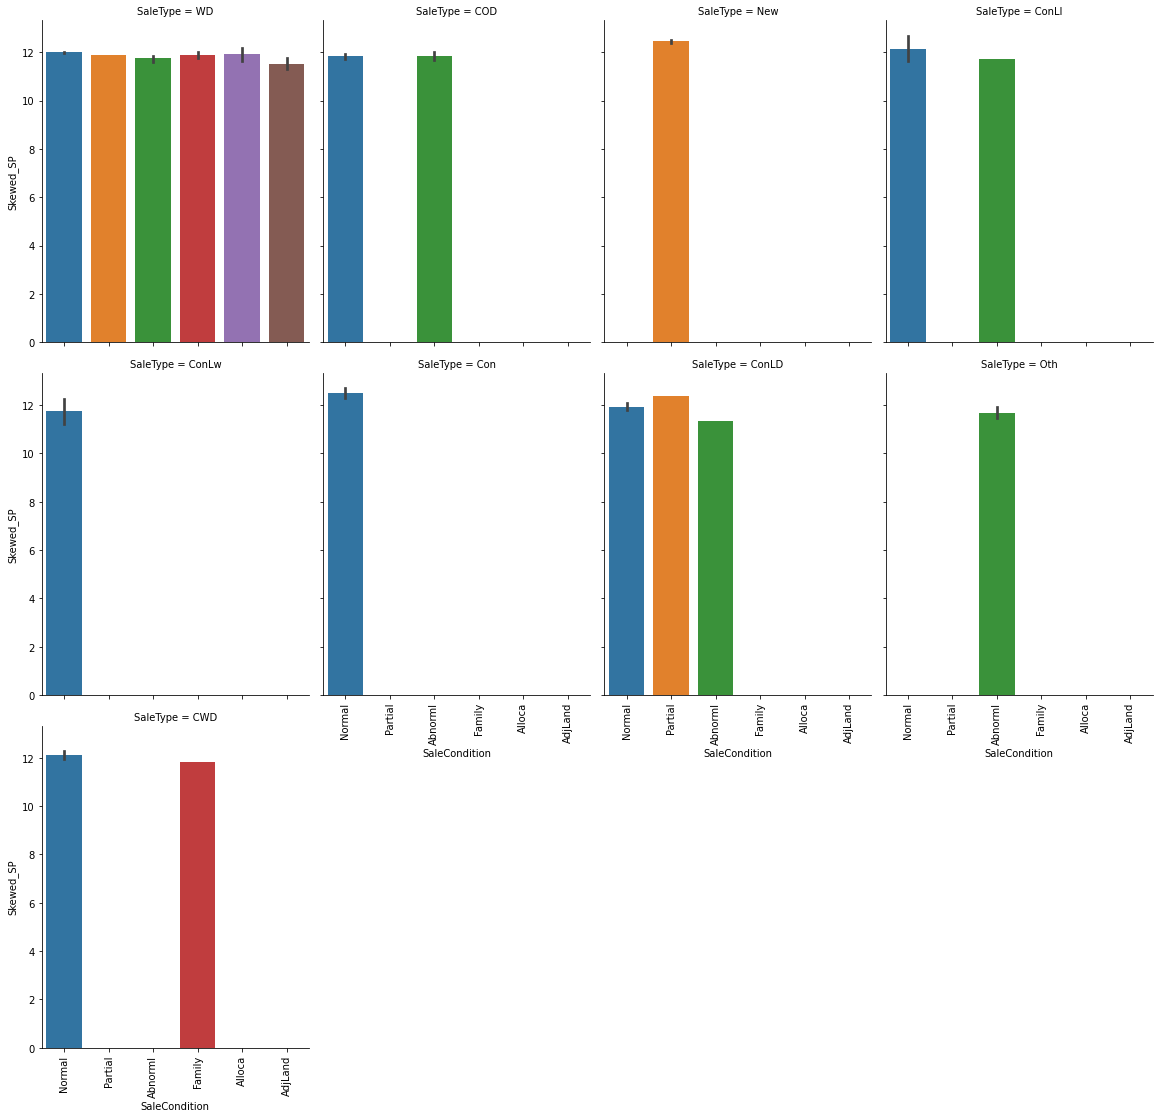

In [34]:
g = sns.factorplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [35]:
#Data Trasformation 
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

Pave    1157
Grvl       3
Name: Street, dtype: int64 



In [36]:
# Turn into one hot encoding 
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [37]:
# Encoded 
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1157
0       3
Name: enc_street, dtype: int64


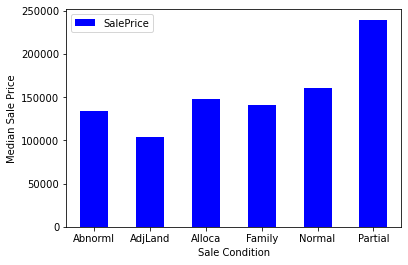

In [38]:
# Feature Engineering
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [39]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)

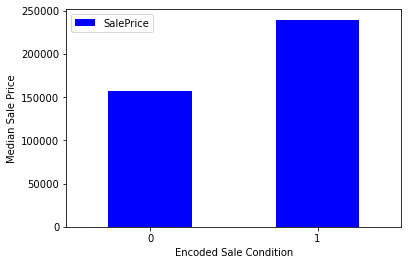

In [40]:
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [41]:
#Interpolation of data 
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [42]:
sum(data.isnull().sum() != 0)

0

In [43]:
# Linear Model for the  train and test
y= np.log(train.SalePrice)
x = data.drop(['SalePrice','Id'], axis=1)

In [44]:
x.shape[0] != y.shape[0]

True

In [45]:
x.shape

(1159, 39)

In [53]:
x.head(3) #one ha to transpose this x data

,1,2,3,4,5,6,7,8,9,10,...,1158,1159,1160,1161,1162,1163,1164,1165,1166,1167
MSSubClass,20.0,60.0,20.0,20.0,60.0,20.0,20.0,20.0,50.0,50.0,...,20.0,90.0,120.0,60.0,30.0,20.0,20.0,160.0,70.0,60.0
LotFrontage,95.0,92.0,105.0,81.5,58.0,73.0,88.0,70.0,80.0,50.0,...,61.0,42.0,53.0,49.0,45.0,56.0,67.0,24.0,50.0,50.0
LotArea,15865.0,9920.0,11751.0,16635.0,14054.0,11341.0,13125.0,9170.0,8480.0,8600.0,...,11250.0,7711.0,4043.0,10762.0,8212.0,9819.0,8777.0,2280.0,8500.0,7861.0


In [46]:
y.shape


(1160,)

In [77]:
y=y[:-1]

In [78]:
y.shape

(1159,)

In [79]:
len(x.columns)

39

In [85]:
y.head(3)#no need to transpose this y

0    11.759786
1    12.498742
2    12.505399
Name: SalePrice, dtype: float64

In [86]:
#x=x.transpose() #this method works to transpose 


In [87]:
x.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'Skewed_SP', 'enc_street', 'enc_condition'],
      dtype='object')

In [88]:
np.reshape(x,(1159,39))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Skewed_SP,enc_street,enc_condition
1,20.0,95.0,15865.0,8.0,6.0,1970.0,1970.0,0.0,351.0,823.0,...,0.0,0.0,224.0,0.0,0.0,10.0,2007.0,12.498746,1.0,0.0
2,60.0,92.0,9920.0,7.0,5.0,1996.0,1997.0,0.0,862.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2007.0,12.505403,1.0,0.0
3,20.0,105.0,11751.0,6.0,6.0,1977.0,1977.0,480.0,705.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2010.0,12.154785,1.0,0.0
4,20.0,81.5,16635.0,6.0,7.0,1977.0,2000.0,126.0,1246.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2009.0,12.278398,1.0,0.0
5,60.0,58.0,14054.0,7.0,5.0,2006.0,2006.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2006.0,12.297790,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,20.0,56.0,9819.0,5.0,5.0,1967.0,1967.0,31.0,450.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2010.0,11.711785,1.0,0.0
1164,20.0,67.0,8777.0,4.0,5.0,1949.0,2003.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,2009.0,11.589896,1.0,0.0
1165,160.0,24.0,2280.0,6.0,6.0,1976.0,1976.0,0.0,566.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,2009.0,11.908347,1.0,0.0
1166,70.0,50.0,8500.0,4.0,4.0,1920.0,1950.0,0.0,0.0,0.0,...,172.0,0.0,0.0,0.0,0.0,7.0,2008.0,10.596660,1.0,0.0


In [89]:
len(x.columns)

39

In [66]:
#np.reshape(x,(39,1159))

In [90]:
x.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Skewed_SP,enc_street,enc_condition
1,20.0,95.0,15865.0,8.0,6.0,1970.0,1970.0,0.0,351.0,823.0,...,0.0,0.0,224.0,0.0,0.0,10.0,2007.0,12.498746,1.0,0.0
2,60.0,92.0,9920.0,7.0,5.0,1996.0,1997.0,0.0,862.0,0.0,...,0.0,0.0,0.0,0.0,0.0,6.0,2007.0,12.505403,1.0,0.0
3,20.0,105.0,11751.0,6.0,6.0,1977.0,1977.0,480.0,705.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2010.0,12.154785,1.0,0.0


In [74]:
x.shape

(1159, 39)

In [56]:
#y=y.transpose()

In [91]:
from sklearn.model_selection import train_test_split


In [92]:
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=42, test_size=.33)

In [93]:
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)

In [52]:
from sklearn import linear_model
from sklearn import ensemble

#lr =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
#lr = linear_model.TheilSenRegressor()
#lr = linear_model.RANSACRegressor(random_state=50)

In [94]:
model = lr.fit(x_train, y_train)

In [95]:
print ("R^2 is: \n", model.score(x_test, y_test))

R^2 is: 
 -0.11386232534936935


In [97]:
predictions = model.predict(x_test)

In [98]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 0.1868001892542121


Text(0.5, 1.0, 'Linear Regression Model')

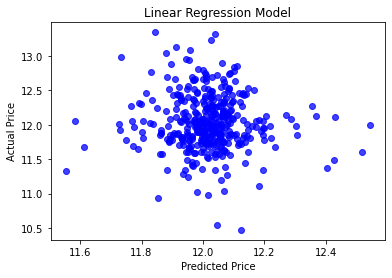

In [99]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
#pltrandom_state=None.show()

<ipython-input-102-0fa4e82d933b>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


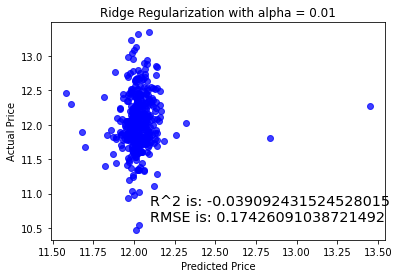

<ipython-input-102-0fa4e82d933b>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


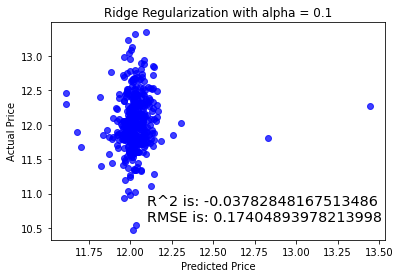

<ipython-input-102-0fa4e82d933b>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


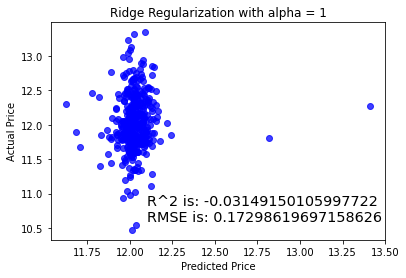

<ipython-input-102-0fa4e82d933b>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


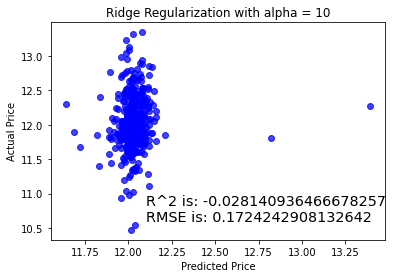

<ipython-input-102-0fa4e82d933b>:14: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')


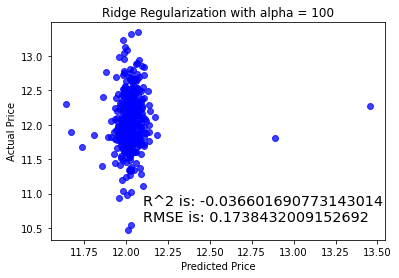

In [102]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(x_train, y_train)
    preds_ridge = ridge_model.predict(x_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(x_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [103]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [104]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()

In [107]:
feats

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,20,86.000000,14157,9,5,2005,2006,200.0,1249,0,...,0,0,0,0,NaN,0,7,2007,1.0,0
1,120,82.333333,5814,8,5,1984,1984,0.0,1036,0,...,0,0,0,0,NaN,0,8,2009,1.0,0
2,20,78.666667,11838,8,5,2001,2001,0.0,0,0,...,0,0,0,0,NaN,0,6,2009,1.0,0
3,70,75.000000,12000,7,7,1941,1950,0.0,275,0,...,0,0,0,0,NaN,0,7,2009,1.0,0
4,60,86.000000,14598,6,5,2007,2007,74.0,0,0,...,0,0,0,0,NaN,0,1,2008,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,20,78.000000,10206,8,5,2007,2007,468.0,33,0,...,0,0,0,0,NaN,0,10,2008,1.0,0
288,20,57.000000,9245,5,5,1994,1995,0.0,686,0,...,0,0,0,0,NaN,0,2,2008,1.0,0
289,20,53.500000,11241,6,7,1970,1970,180.0,578,0,...,0,0,0,0,NaN,700,3,2010,1.0,0
290,50,50.000000,5000,6,7,1947,1950,0.0,399,0,...,36,0,0,0,NaN,0,10,2006,1.0,0


In [108]:
final_predictions = np.exp(predictions)

In [109]:
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

Original predictions are: 
 [11.94692097 12.18112284 11.93533502 12.02779442 12.1123206 ] 

Final predictions are: 
 [154341.19374962 195071.77317036 152563.32270793 167341.91904376
 182101.70050543]


In [111]:
submission.to_csv('submission1.csv', index=False)